In [1]:
#Preprocessing
from google.colab import files
uploaded =files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [19]:
## Melihat Data
## Code Untuk Melihat Data Menggunakan pandas
import io
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
!pip install pandas-profiling
df2 = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
## Memeriksa data
## Kode untuk melihat data mana saja yang bernilai nul / NaN
print(df2.isnull())

## Kode untuk menghitung jumlah nul / NaN pada sebuah data
print(df2.isnull().sum().sum())


          id   date  price  bedrooms  ...    lat   long  sqft_living15  sqft_lot15
0      False  False  False     False  ...  False  False          False       False
1      False  False  False     False  ...  False  False          False       False
2      False  False  False     False  ...  False  False          False       False
3      False  False  False     False  ...  False  False          False       False
4      False  False  False     False  ...  False  False          False       False
5      False  False  False     False  ...  False  False          False       False
6      False  False  False     False  ...  False  False          False       False
7      False  False  False     False  ...  False  False          False       False
8      False  False  False     False  ...  False  False          False       False
9      False  False  False     False  ...  False  False          False       False
10     False  False  False     False  ...  False  False          False       False
11  

In [21]:
## Mengecek jika masih terdapat data yang NULL
print('Null data shown as column:',df2.isnull().sum())

Null data shown as column: id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [22]:
## Melihat profiling dari dataset
import pandas_profiling
pandas_profiling.ProfileReport(df2)

Number of variables,21
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74e4b5d68>,
      dtype=object)

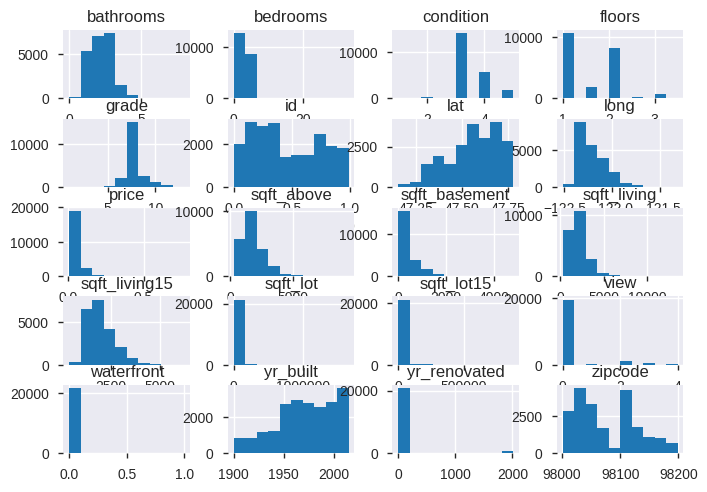

In [23]:
## Membuat histogram dari setiap kolom
df2.hist()

In [25]:
# Melihat keterkaitan antara kolom satu dengan lainnya
df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


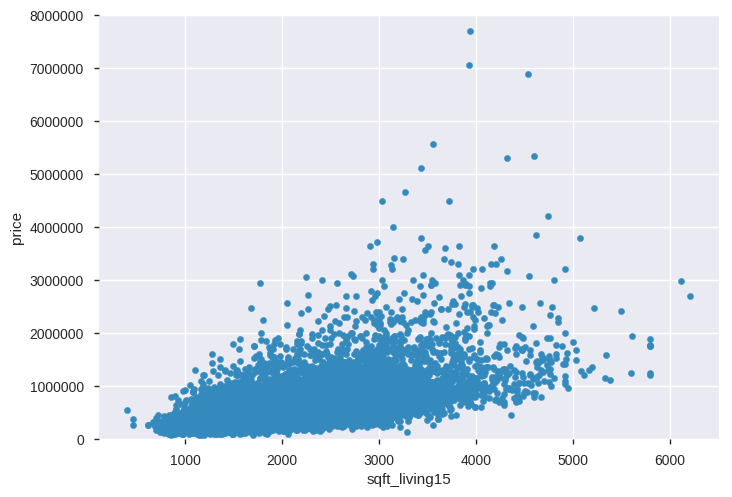

In [32]:
# Membuat plot dengan menampilkan keterkaitan antara data pada kolom price
var = 'sqft_living15'
data = pd.concat([df2['price'], df2[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000));

In [34]:
## Melakukan standarisasi data untuk mengurangi skewdness dan kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df2['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


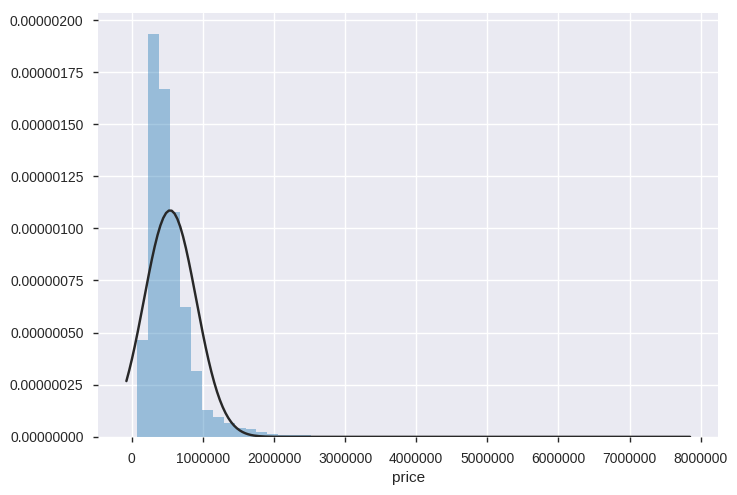

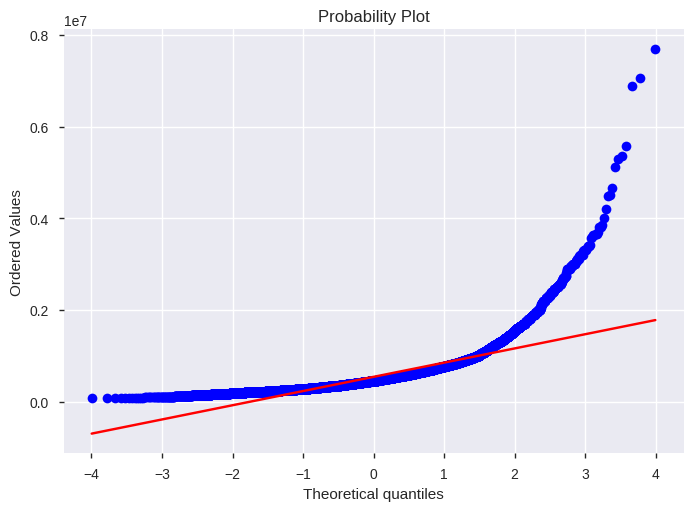

In [40]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#histogram and normal probability plot
sns.distplot(df2['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df2['price'], plot=plt)

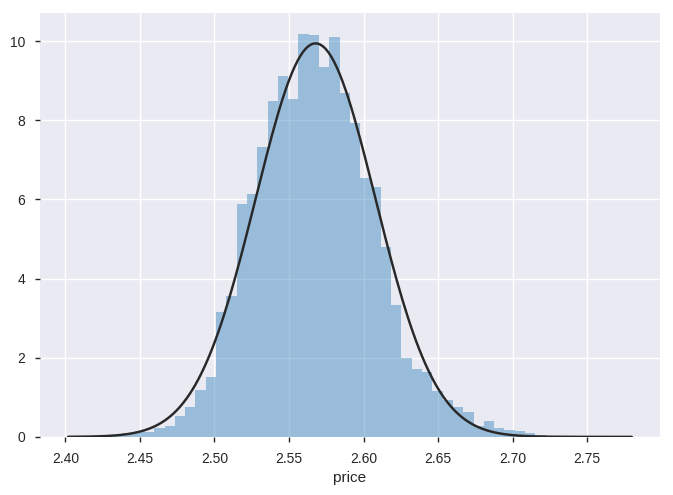

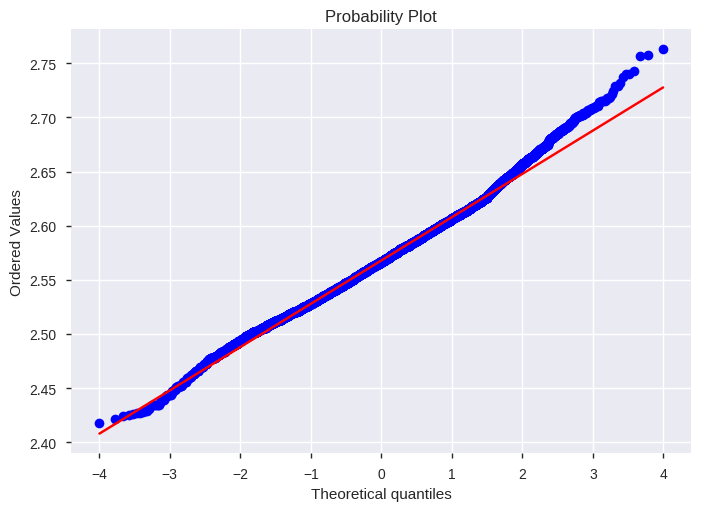

In [43]:
## Mengaplikasikan transformasi log
df2['price'] = np.log(df2['price'])

#transformasi histogram dan normal probabilitas plot
sns.distplot(df2['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df2['price'], plot=plt)

In [0]:
Y = df2.price.values

## Membuat fitur kolom
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
X=df2[feature_cols]



In [0]:
## Membuat data train dan data test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)

In [47]:
# Menghitung regressi berdasarkan data train dan data test

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
## Mencari akurasi data train dan data test
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 77%'